17/12/2025

voir la strat pine trading view
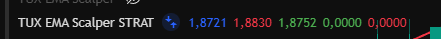


In [ ]:
#code initial de l'indicateur : 
study(title="Tony's EMA Scalper - Buy / Sell", shorttitle="TUX EMA Scalper", overlay=true)
len = input(20, minval=1, title="Length")
src = input(close, title="Source")
out = ema(src, len)
plot(out, title="EMA", color=blue)
last8h = highest(close, 8)
lastl8 = lowest(close, 8)

plot(last8h, color=red, linewidth=2)
plot(lastl8, color=green, linewidth=2)


bearish = cross(close,out) == 1 and close[1] > close 
bullish = cross(close,out) == 1 and close[1] < close 

plotshape(bearish, color=red, style=shape.arrowdown, text="Sell", location=location.abovebar)
plotshape(bullish, color=green, style=shape.arrowup, text="Buy", location=location.belowbar)


In [ ]:
# transformé en stratégie par chagpt :
//@version=6
strategy(
     title = "Tony's EMA Scalper - Strategy",
     shorttitle = "TUX EMA Scalper STRAT",
     overlay = true,
     default_qty_type = strategy.percent_of_equity,
     default_qty_value = 10,
     pyramiding = 0
)

// =====================
// PARAMÈTRES
// =====================
len = input.int(20, minval=1, title="EMA Length")
src = input(close, title="Source")

// =====================
// INDICATEURS
// =====================
ema_val = ta.ema(src, len)
plot(ema_val, title="EMA", color=color.blue)

// High / Low 8 bougies
last8h = ta.highest(close, 8)
lastl8 = ta.lowest(close, 8)

plot(last8h, color=color.red, linewidth=2)
plot(lastl8, color=color.green, linewidth=2)

// =====================
// CONDITIONS
// =====================

// Try to reduc shit trades

bullish = ta.crossover(close, ema_val)
bearish = ta.crossunder(close, ema_val)

// =====================
// ENTRÉES / SORTIES
// =====================
if bullish
    strategy.entry("Long", strategy.long)
    strategy.close("Short")

if bearish
    strategy.entry("Short", strategy.short)
    strategy.close("Long")

// =====================
// VISUELS
// =====================
plotshape(bullish, color=color.green, style=shape.arrowup, text="Buy", location=location.belowbar)
plotshape(bearish, color=color.red, style=shape.arrowdown, text="Sell", location=location.abovebar)


Beaucoup de trade mais BEACOUP de petit trade de merde qui servent à rien:

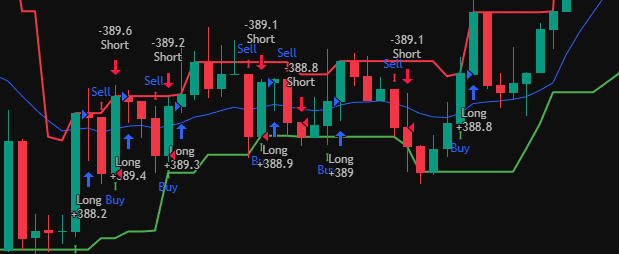
L'objectif serait de filtrer ces derniers

peut etre voir avec deepseek ou claude

Voir aussi la fermeture des trade car là le trade ce ferme si le signal opposé est detecté

Aussi voir peut etre pour déclencher le trade pendant la bougie et non à la suivante (a voir ça car c'est quand meme bien a  la cloture, ça permet d'etre sur. Mais l'inconvenient c'est le retard dans le trade et donc moins de profit ou perte ed profit)

**20/12/2025 19:08**

Voir avec chat gpt pour faire la suite sur 2_AméliorationAvecMoinsDeTrade copy.ipynb

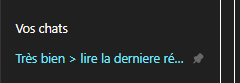


**22/12**

Comparer le script python qui ne correspond pas à la stratégie tradingview "C:\Users\gunsa\Desktop\Git-Repo\Bot-Trading\Strat TradingView\bollingerband + rsi 3min.pine"

**01/01/2026**

vu les indicateurs qui faudrait probablement combiné :
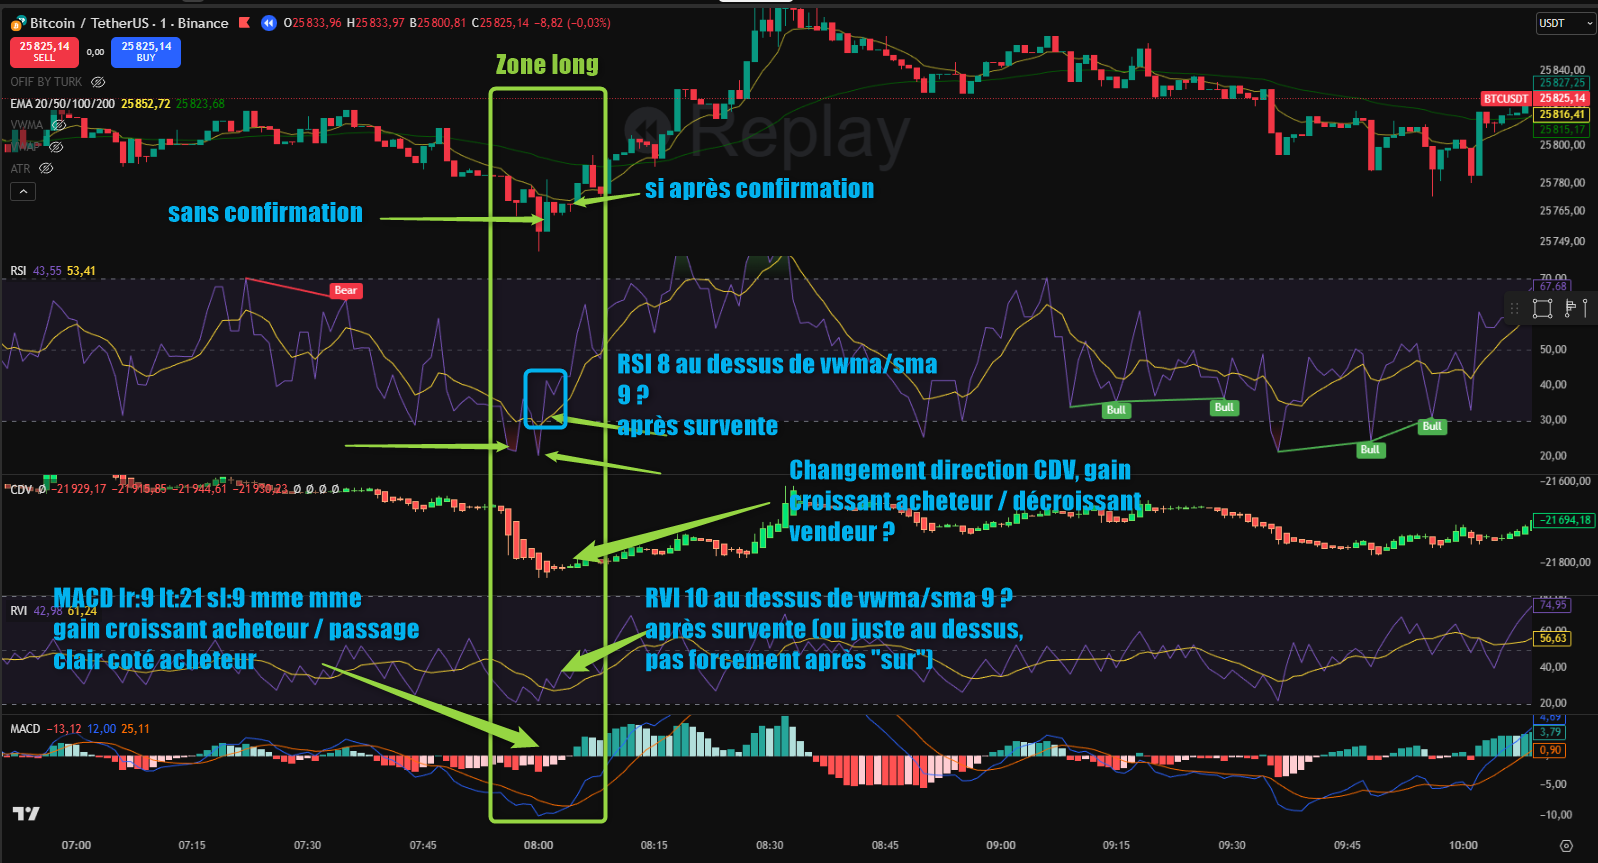




se renseigner sur ce que c'est que CDV MACD, les différence réel RSI/RVI
et SURTOUT faire des des test sur dautre données car là je menbale peut être j'ai fait qu'un seul test

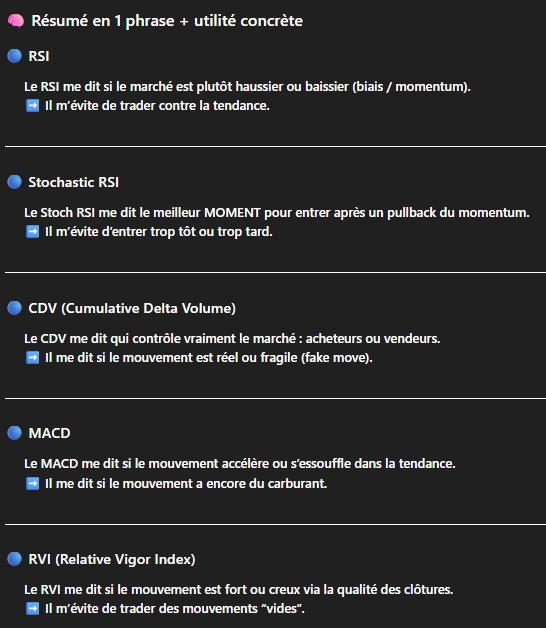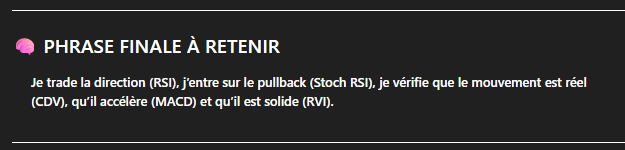

**Liste des condition de trading**  
**Note** : sur achat voir entre 70 et 65 / sur vente 30 et 25  
**Note** : pour **rsi** voir pour utiliser aute que vwma en lissage  
**Note** : pour le croisement de **K** et **D**, ya moyen que spécifier la valeur approximative du croissement ne soit pas trop nécésaire car on test déjà si surachat/vente avec rsi donc peu de change que le stoch soit au "milieu" (75< ou > 25). Mais on le met quand même car si on baisse le rsi plus tard on pourra mieux filter avec cette valeur du stoch.  
Edit : ***au final je ne le met pas pour l'instant c'est un peu "complexe" pour le calcul on verra si on a des trades de merde avec des valeur de stoch mauvaise.***  
**Note** :  J'ai regarder pour le *RVI*, je sais pas trop si on va l'ajouter, il faudra voir avec les résultat si il aurait pu etre décisif. Si oui : Utiliser la différence de valeur entre deux bougies ?   croisement avec sma,vwap ... ?  
**Note** : Pour **MACD** je pense que si on fait le cross de macd + signal on va arriver tard sur les mouvement donc pas pour l'instant mais a essayer plus tard. **Actuellement : (lr8,lt21,sl8,mme,mme)**  
**Note** : **Impérativement** : Il va falloir faire en sorte que les indicateurs ce "prolonge" sur quelques bougies, car si on n'as pas les signaux tous d'un coup on aura jamais trade. Surtout pour le macd, si on veux avoir le dégrésif ou progressif, il va forcement falloir stocker la/les valeurs précédentes pour pourvoir les traiter.  
**Note** : **Hausse MACD HISTOGRAMME** 2 bougie : 
**Note** : Pour les entrées pour plus réactivité, peut etre essayer : entrée si (surachat/vente bien evidemment) MACD HISTOGRAMME sur 1 bougie favorable et croisement k et d. En gros si le croisement a lieu alors que ya pas encore la confirmation de deux bougies sur MACD : rentrer quand même.  
|  
|  **1**- 1min   
|     **SHORT ENTRY** : ( RSI(8) en surachat (>=75) ) **+** ( KStoch RSI(K3,D3,rsi8,stoch14) croise en dessous de D ) **+** ( MACD HISTOGRAMME en baisse sur 2 bougie        (voir note) apres les deux premier signaux (rsi et stoch) )  
|     **LONG ENTRY** : ( RSI(8) en survente (<=25) ) **+** ( KStoch RSI(K3,D3,rsi8,stoch14) croise au dessus de D ) **+** ( MACD HISTOGRAMME en hausse sur 2 bougie apres les deux premier signaux (rsi et stoch))  
|     **SHORT EXIT** : ( RSI(8) en survente (<=25) ) **+** ( KStoch RSI(K3,D3,rsi8,stoch14) croise au dessus de D ) **+** ( MACD HISTOGRAMME en hausse sur 2 bougie apres les deux premier signaux (rsi et stoch))  
|     **LONG EXIT** : ( RSI(8) en surachat (>=75) ) **+** ( KStoch RSI(K3,D3,rsi8,stoch14) croise en dessous de D ) **+** ( MACD HISTOGRAMME en baisse sur 2 bougie          apres les deux premier signaux (rsi et stoch) )  
|  
|   **Choses à verfier sur les resultat**  
|
|       - Comparer pour si mieux / moins bien avec dautre indicateur  
|       - Confirmation trade avec croisement vwma sur rsi utile ?  

voir timeframe 5janv 15:17 et 17:11 environ

05/01/26

essayé dautre valeur franchement je sais pas trop entre change entrée ou sortie ou faire autre choses completement

06/01/26  
je vais essayé le trading ultra court terme sur des actifs à gros pourcentage  

pour rappel les indicateur sur du 1minute que javais mis avant :  
rsi : 8 avec VWMA 9 (tradingview)  
stoch rsi : k3 d3 rsi8 sotch14  
RVI : l8 décalage0 SMA9  
macd lr8 ll21 sl8 mme mme  

OOKKK

essayé strat : 
si k au dessus de d > long
si k en dessous de d > short
voir pour mettre un decallage sur le stoch ça peut regler les soucis de retard sur les rentree
pour les sorties : pareille que la strat davant pour linstant



si stoch défavorable mais si rsi favorable > au dessus 50 pour long et en dessous 50 pour short ?